# ECE457A Assignment 2

**By: Logan Hartford**

**Due: 10/11/2024**

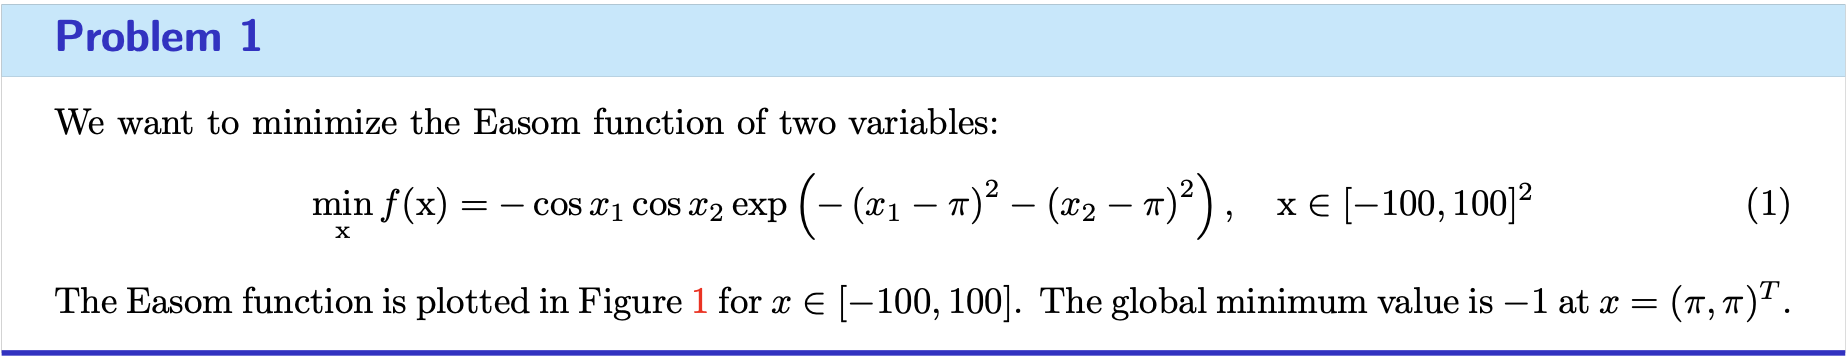

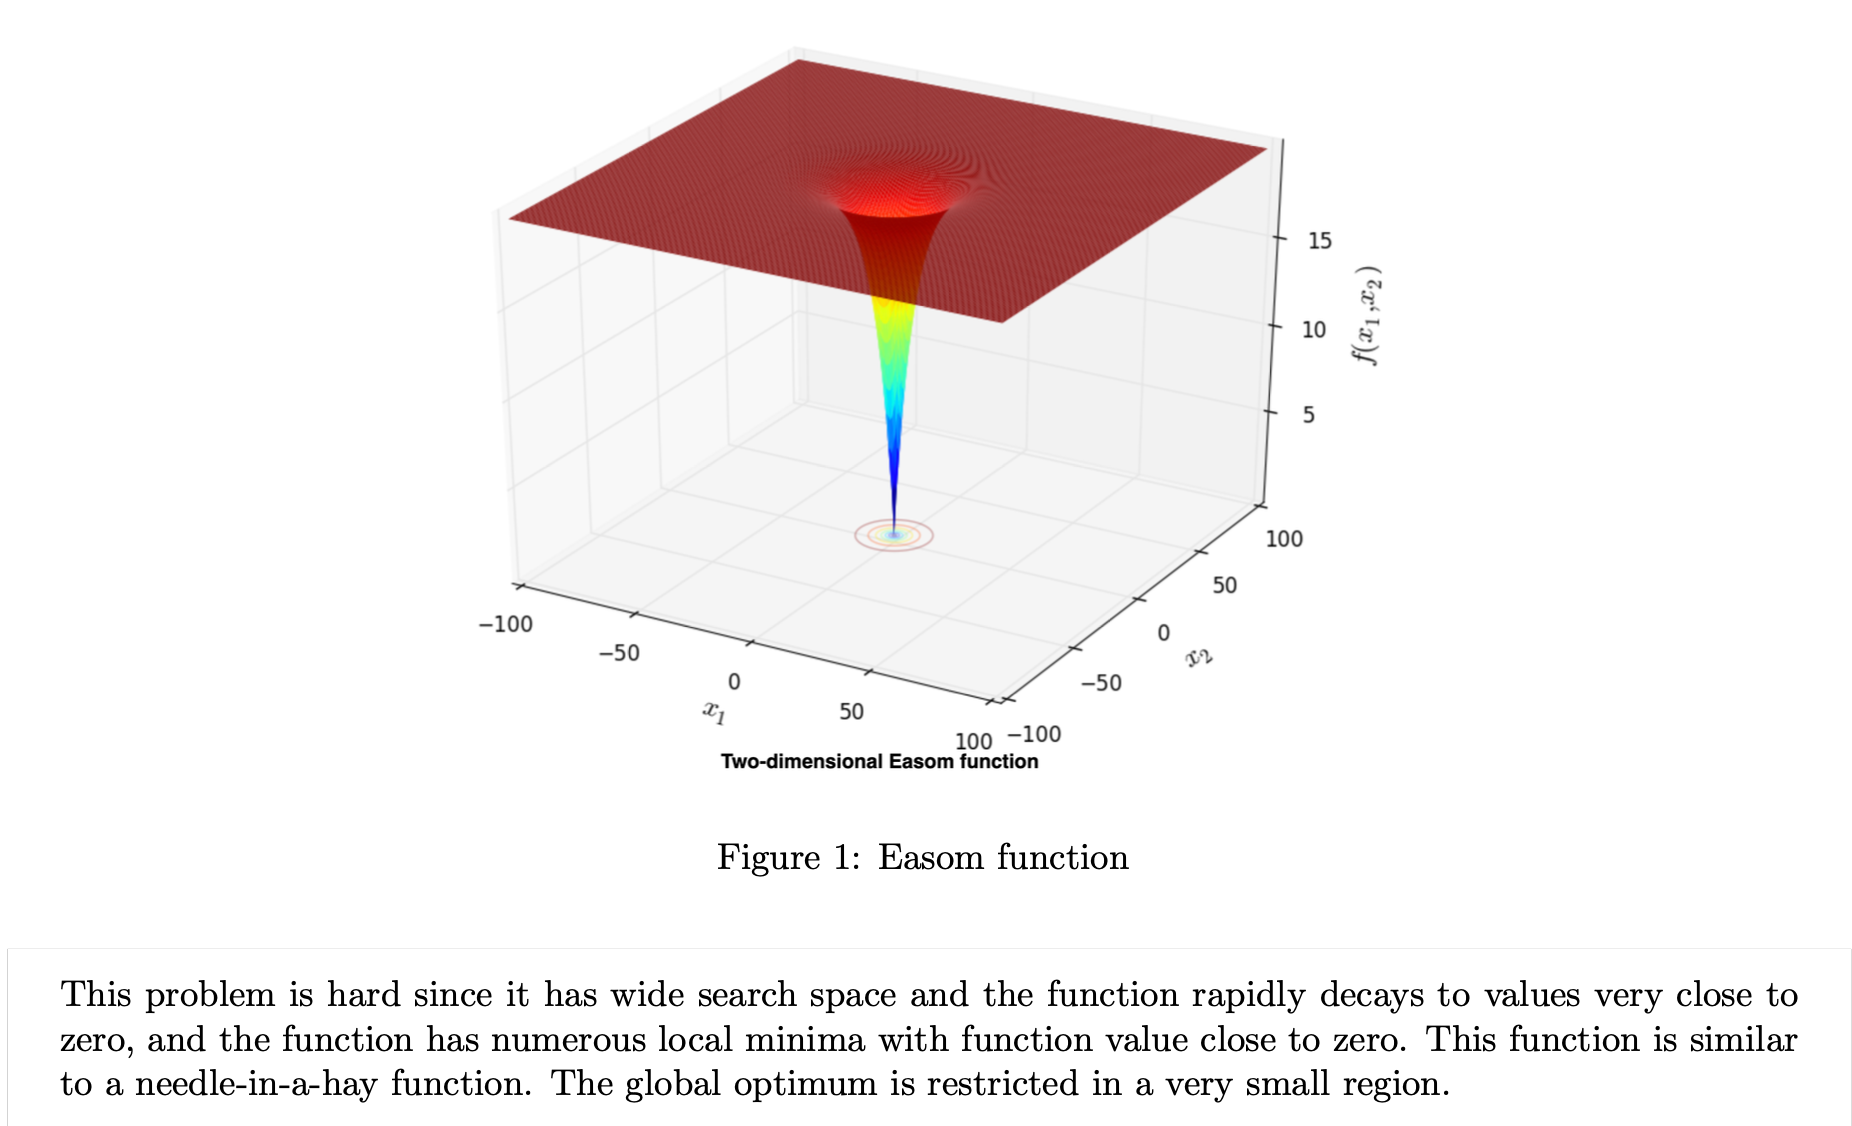

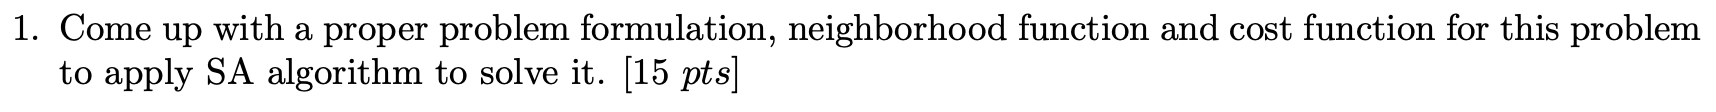

### 1.1 Problem Formulation

#### 1.1.1 Objective
- Minimize the Easom function.

#### 1.1.2 Search Space
- The search space consists of all possible pairs of input values within the given range. 
- This means any combination of two values between -100 and 100 is a potential solution.

#### 1.1.3 Initial Solution
- Start with a randomly chosen pair of input values within the search space.

#### 1.1.4 Neighboorhood Definition
- A neighboring solution is found by slightly altering the current pair of input values.
- This adjustment is done by adding a small random change to each input. 
- The amount of change should decrease gradually as the solution progresses.

#### 1.1.5 Acceptance Criteria
- Compare neighbooring solution with current solution.
- If the new solution is better, accept it.
- If it is worse, accpet it based on a probability that decreases as the algorithm proceeds.

#### 1.1.6 Cooling Schedule
- Gradually reduce the temperature parameter over time. 
- The temperature starts high, allowing more frequent acceptance of worse solutions to escape local minima.
- Then decreases progressivly to make the algorithm more selective as it converges to a minimum.

#### 1.1.7 Stopping Criteria
- The temperature becomes very low, or
- A maximum number of iterations is reached, or 
- There is no noticeable improvement in the function value over a set number of iterations.

#### 1.1.8 Evaluation and Output
- Track the best solution found throughout the optimization process.
- Evaluate the performance of the algorithm with different parameter settings.

### 1.2 Neighborhood Function
- Generates new candidates by making small random changes to the current inputs.
- The small random changes are often taken from Guassian distribution with mean 0 or a uniform distribution.

### 1.3 Cost Function
- The cost function evaluates the quality of a state.
- In this case, the only measure of quality it the value of the function at a state.
- The cost function is therefore, the function itself.

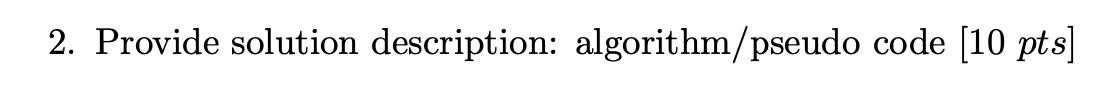

### 1.2 Pseudo Code

#### Algorithm: Simulated Annealing for Minimizing Easom Function

**Input:**  
Initial solution `(x1, x2)`, initial temperature `T`, cooling rate `alpha`,  
minimum temperature `Tmin`, maximum iterations `max_iter`

**Output:**  
Best solution found `(x1_best, x2_best)` and its function value `f_best`

1. Initialize `(x1_current, x2_current)` with a random point in `[-100, 100]^2`
2. Set `x1_best`, `x2_best` to `x1_current`, `x2_current`
3. Compute `f_current = Easom(x1_current, x2_current)`
4. Set `f_best = f_current`
5. While `T > Tmin`:
    
    a. For `i = 1` to `max_iter`:
        
    i.   Generate new potential solution `(x1_new, x2_new)` by adding a small random change  
            to `(x1_current, x2_current)`  
            - `x1_new = x1_current + random change`  
            - `x2_new = x2_current + random change`

    ii.  Compute `f_new = Easom(x1_new, x2_new)`

    iii. If `f_new < f_current`:
            - Accept the new solution  
            - Set `(x1_current, x2_current) = (x1_new, x2_new)`  
            - Set `f_current = f_new`  
            Else:
            - Accept the new solution with probability `P = exp(-(f_new - f_current) / T)`  
                (generate a random number between 0 and 1; if it is less than `P`, accept the solution)

    iv.  If `f_current < f_best`:
            - Update the best solution: `(x1_best, x2_best) = (x1_current, x2_current)`  
            - Set `f_best = f_current`

    b. Reduce the temperature: `T = alpha * T`

6. Return `(x1_best, x2_best)` and `f_best`


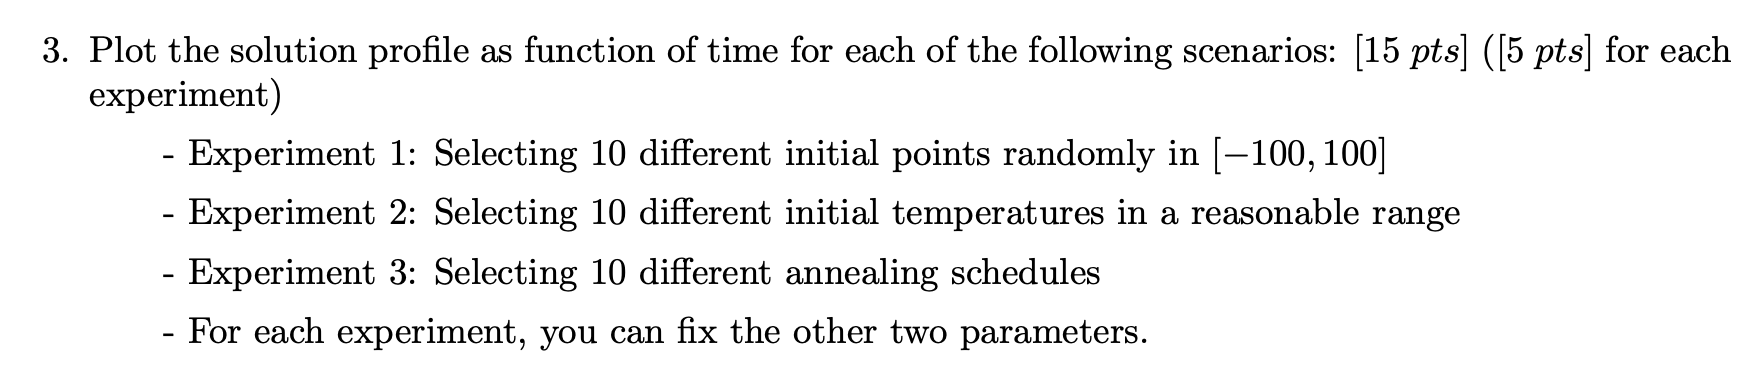

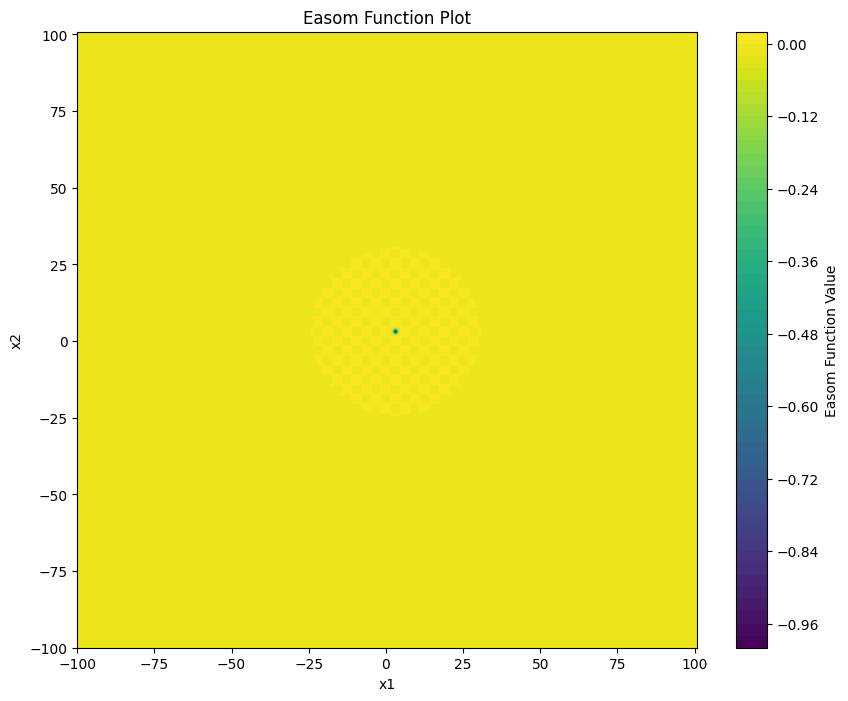

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def easom(x1, x2):
    return -np.cos(x1) * np.cos(x2) * np.exp(-(x1 - np.pi)**2 - (x2 - np.pi)**2)

# Chat gpt made this function
def plot_easom_function():
    x1_vals = np.arange(-100, 101, 0.1)
    x2_vals = np.arange(-100, 101, 0.1)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

    z_vals = easom(x1_grid, x2_grid)

    plt.figure(figsize=(10, 8))
    plt.contourf(x1_grid, x2_grid, z_vals, levels=50, cmap='viridis')
    plt.colorbar(label='Easom Function Value')
    plt.title('Easom Function Plot')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plot_easom_function()


In [6]:
print(easom(np.pi, np.pi))
print(easom(3, 3))
print(easom(2, 2))

-1.0
-0.9415641575364946
-0.012779642669914994


In [7]:
def simulated_annealing(initial_solution, initial_temp, cooling_rate, max_iter, min_temp, step_size=5):
    x1_current, x2_current = initial_solution
    f_current = easom(x1_current, x2_current)
    x1_best, x2_best, f_best = x1_current, x2_current, f_current
    T = initial_temp

    f_history = [f_best]

    for i in range(max_iter):
        # Generate neighbour
        x1_new = x1_current + np.random.uniform(-step_size, step_size)
        x2_new = x2_current + np.random.uniform(-step_size, step_size)
        print(x1_new, x2_new)
        f_new = easom(x1_new, x2_new)

        diff = f_new - f_current
        metropolis = np.exp(-(diff) / T)
        prob = np.random.rand()
        # print(f"diff: {diff}, metropolis: {metropolis}, prob: {prob}")
        if diff < 0 or prob < metropolis:
            x1_current, x2_current, f_current = x1_new, x2_new, f_new

        # Update best solution
        if f_current < f_best:
            x1_best, x2_best, f_best = x1_current, x2_current, f_current

        f_history.append(f_best)

        # Cool down
        T *= cooling_rate

        if i % 100 == 0:
            print(f"Iteration {i}, Best solution: {f_best}")

    return (x1_best, x2_best), f_best, f_history


In [8]:
best, f_best, f_history = simulated_annealing((50, 50), 100, 0.99, 10000, 0.1, step_size=1)

50.570087454341625 49.095284506709824
Iteration 0, Best solution: -0.0
50.35624832458688 49.96759704448076
50.05342442576141 50.32415214648244
50.10098941430491 50.66480490433863
50.02019534009622 51.53378933750333
50.61886433959236 51.05272576312663
50.72119254309512 50.81992119196155
50.03143088514215 50.715785711179606
51.02502138824133 50.23621958666245
51.785298151561484 50.47717616281041
50.878254716873265 50.260912671125176
50.39637569060129 50.13898272821401
49.84873615849492 49.582765410353765
48.93610232982916 49.8672275512476
48.49879657477788 49.71610854655844
48.3914056061981 50.53640826001375
48.55883070328597 51.133482602541356
47.566110469433355 51.16823214408093
47.82280436884485 51.40699908270588
47.21418739139507 50.46143631196884
47.4139676686246 50.720529716787055
47.01705106699633 49.94901245965953
47.65892269561258 49.123825620488596
47.34857793934405 49.80462269436819
48.082470974095834 49.4753442880682
48.930415444170364 48.75765888971444
48.803585023218616 49.

[-46.79894484   9.74502453]
46.869955176940785 36.71486510960086
Iteration 0, Best solution: -0.0
49.32714462055367 35.853485992842685
53.10670004472311 38.35232612686324
50.59364262728375 34.60963030785748
45.76467307215743 30.122258771822818
43.43039689037074 32.363315458179265
45.39767242188394 28.197253738410012
48.7714206883279 32.083175454417166
50.20384404885183 34.98471674664993
53.13039988561372 31.445843608040345
50.225821773123656 35.69177648182806
52.066866611762414 31.406057072954837
51.81764032369909 35.52176869266606
46.94237194455206 33.98187144761229
43.461448193043026 29.969574412920963
41.75856509445429 28.430010575189794
36.88479895477048 27.771335359111347
38.03208993505394 23.59057598434663
36.16759954644163 23.141032708926815
32.507381341144686 24.52513545457007
32.52057770726171 28.863771336661873
34.961454376479175 31.716805009102135
38.18462963612239 36.47234337556809
37.274085756729754 35.06481061067772
38.010108582837475 34.39648480286874
42.33781022473774 3

/var/folders/2k/4qr02sn90yvdch9k5gzldk5h0000gn/T/ipykernel_59354/415178820.py:17: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-(diff) / T)



-118.64676817030377 62.16422754838248
-114.54066052190151 60.7683179496704
-113.49572992731565 64.13808698287878
-118.41206624613703 63.38271579480541
-114.28344204124163 59.58375019984344
-117.99080212382779 63.433346341734826
-119.4391452227877 68.26972473524496
-116.73711558279186 65.93483608966991
-119.76527906001385 62.46024301367007
-115.58315244333865 64.91225130364307
-113.95917097726947 62.13980895343755
-114.44538558160207 60.956677312819515
-118.68264100275829 65.04625485769009
-120.89270696286437 61.14516181281447
-120.37069942855236 56.322657485928616
-121.71951620256694 59.3603296758921
-120.1278797226199 60.49334184332201
-122.77962821718094 57.649560480004865
-117.86746624103617 58.727662614744595
-121.00850186757745 63.5606350342682
-119.25992284018746 66.9483842795642
-119.08141226400974 64.8298707937745
-120.79132680801267 64.71696405723493
-125.27310067980365 64.6285200245487
-129.5247243039716 62.840751385147236
-128.08453207186676 63.206900515742085
-129.46778292

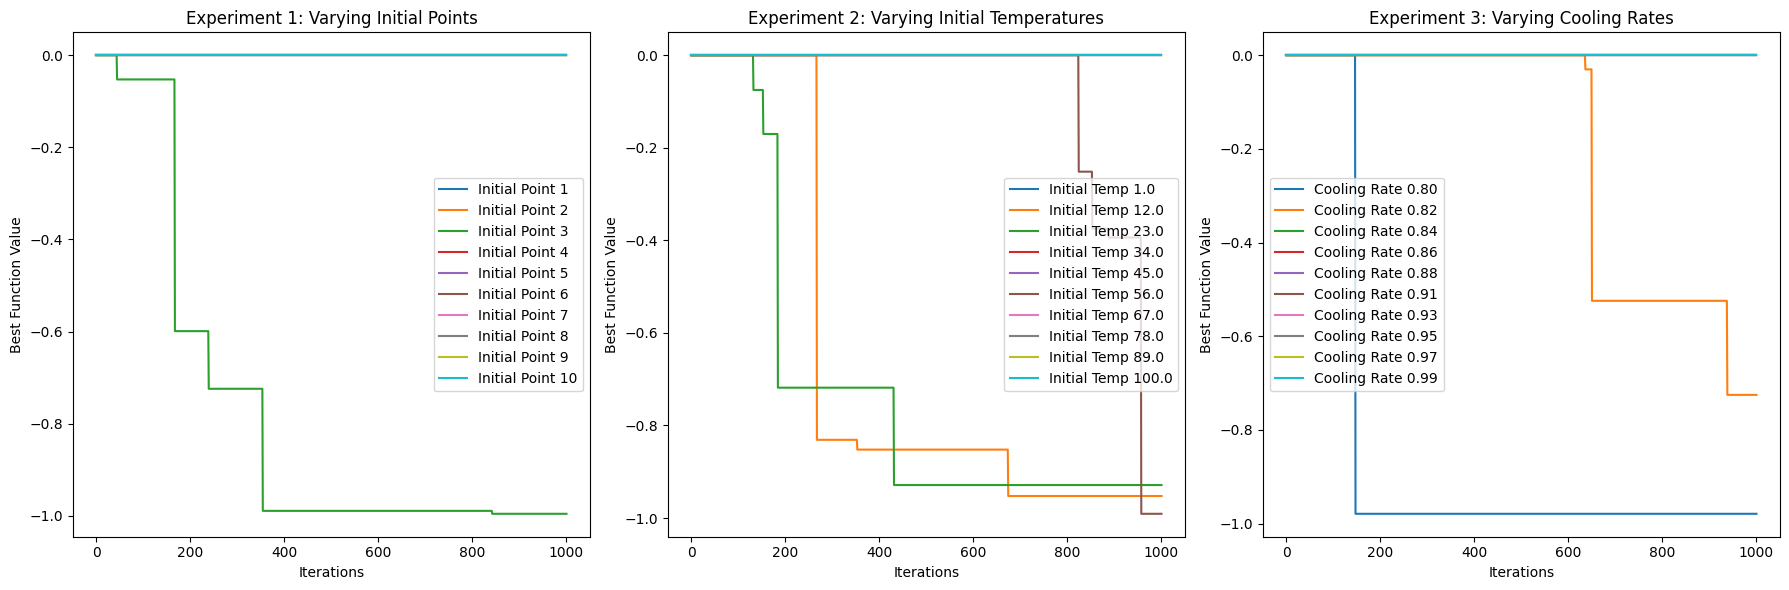

In [9]:
# Parameters for experiments
initial_points = [np.random.uniform(-100, 100, 2) for _ in range(10)]
initial_temperatures = np.linspace(1, 100, 10)
cooling_rates = np.linspace(0.8, 0.99, 10)
min_temp = 1e-14
max_iter = 1000
best_temp = 1
best_cr = 0.95
rand_start = np.random.uniform(-100, 100, 2)
print(rand_start)


# Experiment 1: Varying initial points
experiment1_results = []
for point in initial_points:
    _, _, f_history = simulated_annealing(point, best_temp, best_cr, max_iter, min_temp)
    experiment1_results.append(f_history)

# Experiment 2: Varying initial temperatures
experiment2_results = []
for temp in initial_temperatures:
    _, _, f_history = simulated_annealing(rand_start, temp, best_cr, max_iter, min_temp)
    experiment2_results.append(f_history)

# Experiment 3: Varying cooling rates
experiment3_results = []
for rate in cooling_rates:
    _, _, f_history = simulated_annealing(rand_start, best_temp, rate, max_iter, min_temp)
    experiment3_results.append(f_history)

# Plotting results for each experiment
plt.figure(figsize=(18, 6))

# Plot for Experiment 1
plt.subplot(1, 3, 1)
for i, f_history in enumerate(experiment1_results):
    plt.plot(f_history, label=f'Initial Point {i+1}')
plt.title('Experiment 1: Varying Initial Points')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

# Plot for Experiment 2
plt.subplot(1, 3, 2)
for i, f_history in enumerate(experiment2_results):
    plt.plot(f_history, label=f'Initial Temp {initial_temperatures[i]:.1f}')
plt.title('Experiment 2: Varying Initial Temperatures')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

# Plot for Experiment 3
plt.subplot(1, 3, 3)
for i, f_history in enumerate(experiment3_results):
    plt.plot(f_history, label=f'Cooling Rate {cooling_rates[i]:.2f}')
plt.title('Experiment 3: Varying Cooling Rates')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

plt.tight_layout()
plt.show()

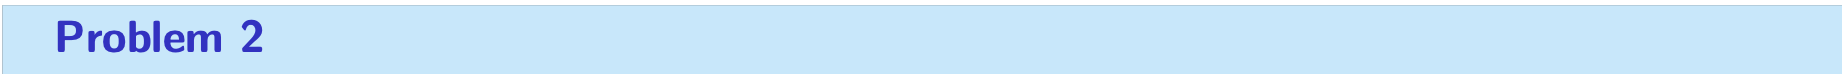

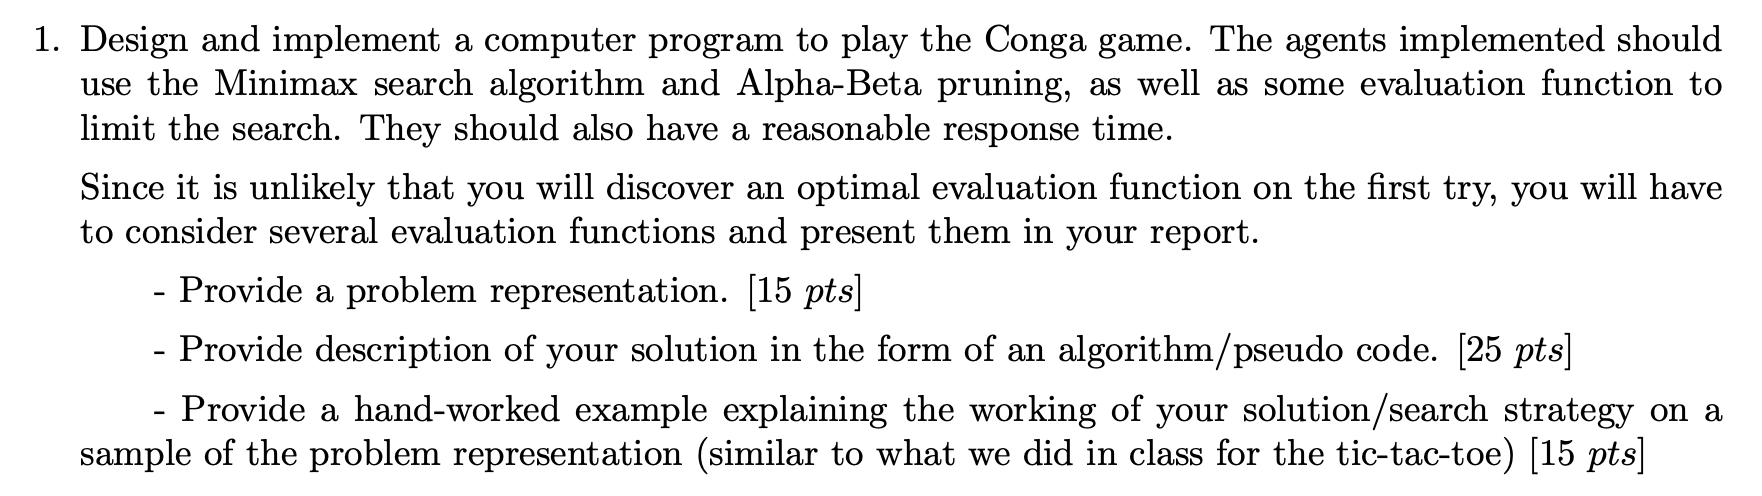

### 2.1 Problem Representation

#### 2.1.1 Objective
- Develop an agent that can play the Conga game rationally, aiming to block the opponent's stones so they have no legal moves.

#### 2.1.2 Search Space
- The search space consists of all possible valid game states.
- Each state is defined by the positions of the stones for both players on a 4x4 board.

#### 2.1.3 Initial Solution
- Player 1 has ten black stones in (1,4), and Player 2 has ten white stones in (4,1).

#### 2.1.4 Neighborhood Definition
- The neighboring states are defined by all possible valid moves for the current player.
- A valid move involves moving stones from one square to one or more adjacent squares, according to the game rules.

#### 2.1.5 Move Evaluation
- Use a Minimax algorithm with Alpha-Beta pruning to evaluate the potential outcomes of moves.
- The evaluation function estimates the quality of a game state for the current player.
- Possible evaluation criteria could include the number of stones in advantageous positions or the number of blocked opponent stones.

#### 2.1.6 Search Strategy
- Use a depth-limited Minimax search with Alpha-Beta pruning to explore possible game states.
- At each turn, select the move that maximizes the minimum score obtainable by the opponent.

#### 2.1.7 Stopping Criteria
- The game ends when one player has no legal moves left.

#### 2.1.8 Evaluation and Output
- Output the chosen move, the evaluation score of the move, and the number of nodes explored during the search.
- Measure the agent's performance by playing multiple games against a Random Agent.

### 2.1 Pseudo Code

#### Function Definitions
1. **Minimax(state, depth, alpha, beta, maximizingPlayer):**
    - **Input:**
        - `state`: Current board configuration.
        - `depth`: Current search depth.
        - `alpha`: The best score that the maximizing player can guarantee so far.
        - `beta`: The best score that the minimizing player can guarantee so far.
        - `maximizingPlayer`: Boolean indicating if the current player is the maximizing player.
    - **Output:**
        - The evaluation score for the current state.

    - **Base Case:**
        - If `depth` is 0 or the game is over (no legal moves for either player), return the evaluation of `state`.

    - **If maximizingPlayer is true:**
        - Set `maxEval = -∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minimax(newState, depth - 1, alpha, beta, false)`
            - `maxEval = max(maxEval, eval)`
            - `alpha = max(alpha, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `maxEval`

    - **Else (minimizingPlayer is true):**
        - Set `minEval = ∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minimax(newState, depth - 1, alpha, beta, true)`
            - `minEval = min(minEval, eval)`
            - `beta = min(beta, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `minEval`

2. **EvaluationFunction(state):**
    - Calculate a score for the given `state`.
    - Some things to try:
        - The number of legal moves available for the opponent.
        - The number of postions controlled by the agent minus the positions controlled by the opponent.
        - Difference is largest concentration of stones between the two players.
        - The total number of squares available for captures across valid moves.
        - Number of stones with valid moves.
    - Return the calculated score.

3. **GenerateLegalMoves(state, player):**
    - Given the current `state` and the `player`, generate a list of all valid moves according to the game rules.
    - Return the list of moves.

#### Main Algorithm

1. **Initialize:**
    - `currentState = initial board configuration`
    - `player = maximizingPlayer (e.g., Player 1)`

2. **Game Loop:**
    - While the game is not over (current player has valid moves):
        - If `player` is the maximizing player:
            - Set `bestMove = None`
            - Set `bestValue = -∞`
            - For each move in `GenerateLegalMoves(currentState, player)`:
                - Apply the move to generate `newState`.
                - `moveValue = Minimax(newState, searchDepth, -∞, ∞, false)`
                - If `moveValue > bestValue`:
                    - `bestValue = moveValue`
                    - `bestMove = move`
            - Update `currentState` with `bestMove`.
        - Else (minimizing player):
            - Follow the same procedure, but minimize the `moveValue`.

        - Switch `player` to the other player.
    
3. **End of Game:**
    - Output the result of the game (winner, final board configuration, number of turns taken).


### 2.1 Hand Worked Example

#### Initial Conditions
- Player1 is Maximizing player.
- Player1 starts.
- Depth = 2
- Start of game.

#### Evaluation Function
- Number of valid moves for Player1, minus number of valid moves for Player2

#### MinMax Tree
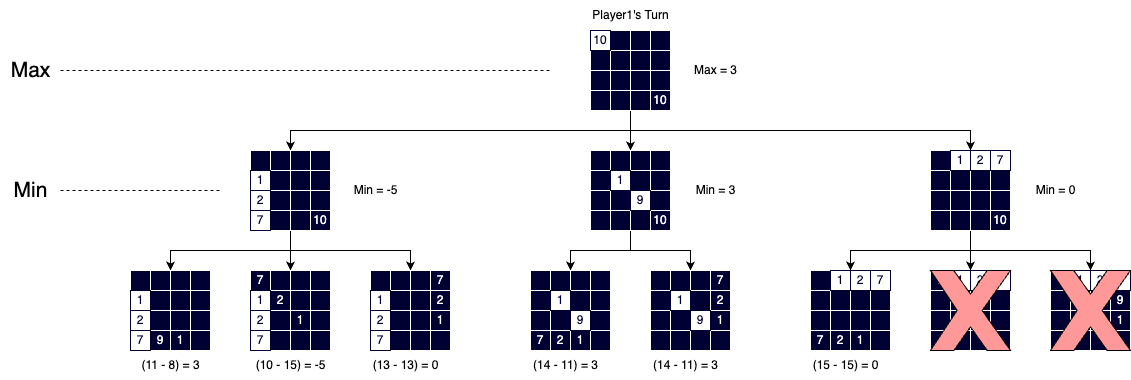

- In this case Player1's first move would be to move diagonally.
- The two right most nodes are never explored becasue they are pruned.
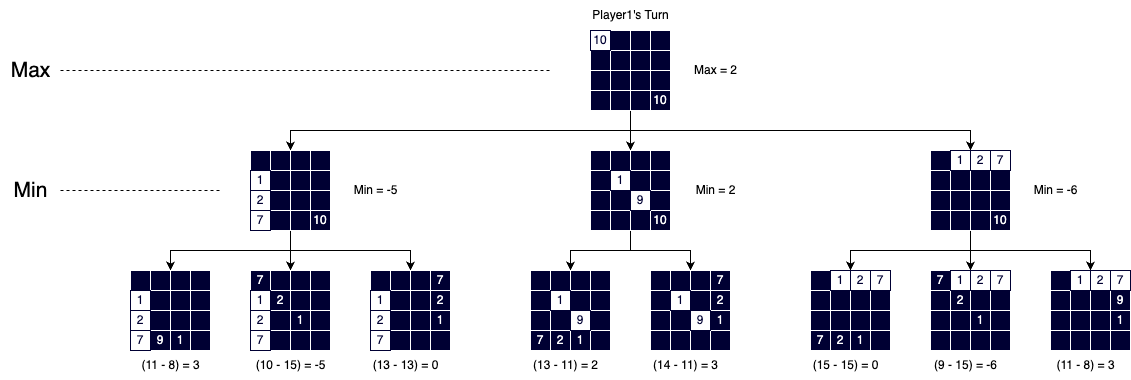

### 2.1 Building out The Game

In [10]:
# Creating the game board
from Q2 import *

board = create_board()
print(board)

[[ 10   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]


In [11]:
# Testing generate_moves function
board = np.array([
        [10, 0, 0, 0],
        [0, -9, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 0],
        ])
player = 1  # Player 1's turn
moves = generate_moves(board, player)
print("Possible moves for Player 1:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

player = -1  # Player 2's turn
moves = generate_moves(board, player)
print("\nPossible moves for Player 2:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

Possible moves for Player 1:
Start: (0, 0), Direction: (1, 0)
Start: (0, 0), Direction: (0, 1)

Possible moves for Player 2:
Start: (1, 1), Direction: (-1, 0)
Start: (1, 1), Direction: (1, 0)
Start: (1, 1), Direction: (0, -1)
Start: (1, 1), Direction: (0, 1)
Start: (1, 1), Direction: (-1, 1)
Start: (1, 1), Direction: (1, -1)
Start: (1, 1), Direction: (1, 1)
Start: (2, 2), Direction: (-1, 0)
Start: (2, 2), Direction: (1, 0)
Start: (2, 2), Direction: (0, -1)
Start: (2, 2), Direction: (0, 1)
Start: (2, 2), Direction: (-1, -1)
Start: (2, 2), Direction: (-1, 1)
Start: (2, 2), Direction: (1, -1)
Start: (2, 2), Direction: (1, 1)


In [12]:
# Testing apply_move function
board = create_board()

move = ((0, 0), (0, 1))  # Move to the right
player = 1  # Player 1's turn
new_board = apply_move(board, move, player)
print("New board state after applying the move:")
print(new_board)

move = ((3, 3), (-1, 0)) # Move up
player = -1  # Player 2's turn
new_board = apply_move(new_board, move, player)
print("New board state after applying the move:")
print(new_board)

move = ((0, 2), (1, 0)) # Move down
player = 1  # Player 2's turn
new_board = apply_move(new_board, move, player)
print("New board state after applying the move:")
print(new_board)

New board state after applying the move:
[[  0   1   2   7]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]
New board state after applying the move:
[[ 0  1  2  7]
 [ 0  0  0 -9]
 [ 0  0  0 -1]
 [ 0  0  0  0]]
New board state after applying the move:
[[ 0  1  0  7]
 [ 0  0  1 -9]
 [ 0  0  1 -1]
 [ 0  0  0  0]]


In [13]:
# Testing minimax function
board = create_board()
depth = 2
alpha = float('-inf')
beta = float('inf')
maximizingPlayer = True

# Pass the custom evaluation function to minimax
score = minimax(board, depth, alpha, beta, maximizingPlayer, eval_move_delta)
print("Minimax evaluation score:", score)

Minimax evaluation score: 3


In [16]:
# Testing play_game function
for i in range(3):
    initial_board = create_board()
    game_depth = 3  # Depth of the minimax search
    final_board, turns = play_game(initial_board, game_depth, eval_move_delta, minimax_agent, do_nothing_agent, verbose=False)
    print("Final board state:")
    print(final_board)
    print(f"Turns: {turns}")

Player 2 has no legal moves. Player 1 wins!
Final board state:
[[  0   0   0   0]
 [  1   1   1   1]
 [  0   1   1   3]
 [  0   0   1 -10]]
Turns: 12
Player 2 has no legal moves. Player 1 wins!
Final board state:
[[  0   0   0   0]
 [  1   1   1   1]
 [  0   1   1   3]
 [  0   0   1 -10]]
Turns: 12
Player 2 has no legal moves. Player 1 wins!
Final board state:
[[  0   0   0   0]
 [  1   1   1   1]
 [  0   1   1   3]
 [  0   0   1 -10]]
Turns: 12


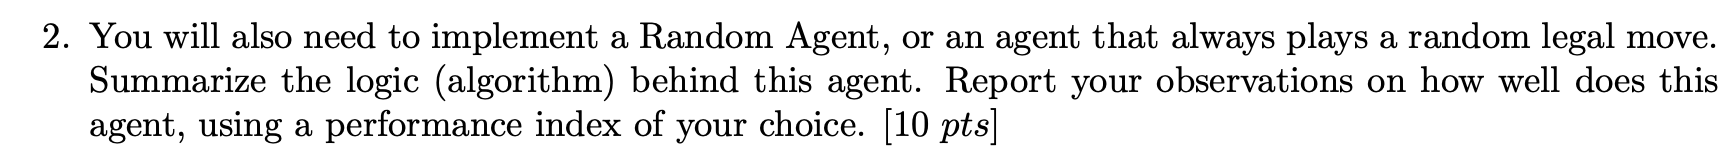

In [18]:
random_agent

<function Q2.random_agent(board, player, *args)>

### 2.2 Random Agent

#### 2.2.1 Logic
- The agent works by selecting a random move from the list of generated moves

### 2.2.2 Perfomance